In [92]:
import pandas as pd
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df=pd.read_csv('Life Expectancy Data.csv')

## EDA


In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.isna().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
df.columns=df.columns.map(lambda x:x.strip().lower().replace(" ","_"))

In [13]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [39]:
#top 10 countires with life expectancy

top_10=df.groupby("country")['life_expectancy'].mean().nsmallest(10)

top_10_df = top_10.reset_index()
top_10_df

,country,life_expectancy
0,Sierra Leone,46.11250
1,Central African Republic,48.51250
2,Lesotho,48.78125
3,Angola,49.01875
4,Malawi,49.89375
5,Chad,50.38750
6,Côte d'Ivoire,50.38750
7,Zimbabwe,50.48750
8,Swaziland,51.32500
9,Nigeria,51.35625


<AxesSubplot:xlabel='country', ylabel='life_expectancy'>

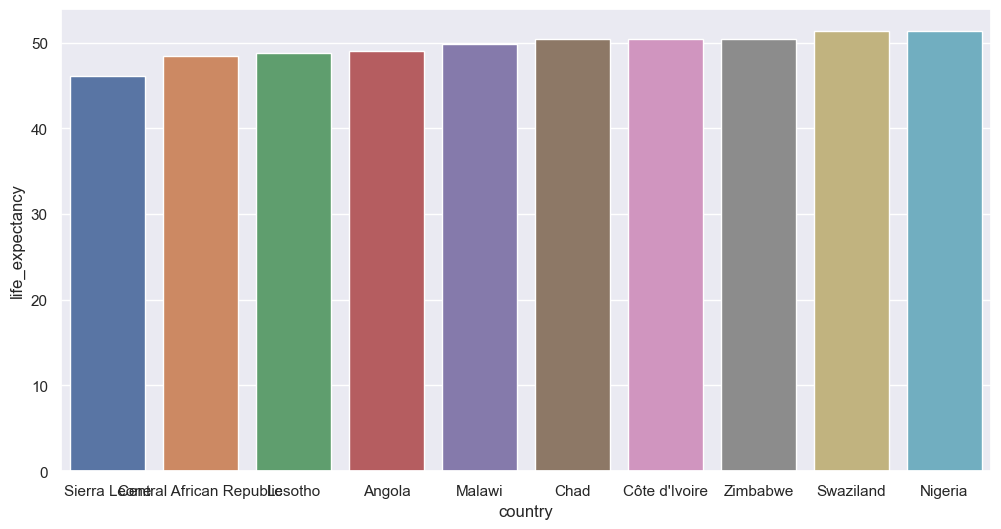

In [41]:

sns.set(rc={'figure.figsize': (12, 6)})

# Create the bar plot using Seaborn
sns.barplot(data=top_10_df, x='country', y='life_expectancy')

In [44]:
#top_10 countires in GDP
top_gdp=df.groupby("country")['gdp'].mean().nlargest(10)
top_gdp

country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: gdp, dtype: float64

In [15]:
x=df.drop("life_expectancy",axis=1)
y=df['life_expectancy']

<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

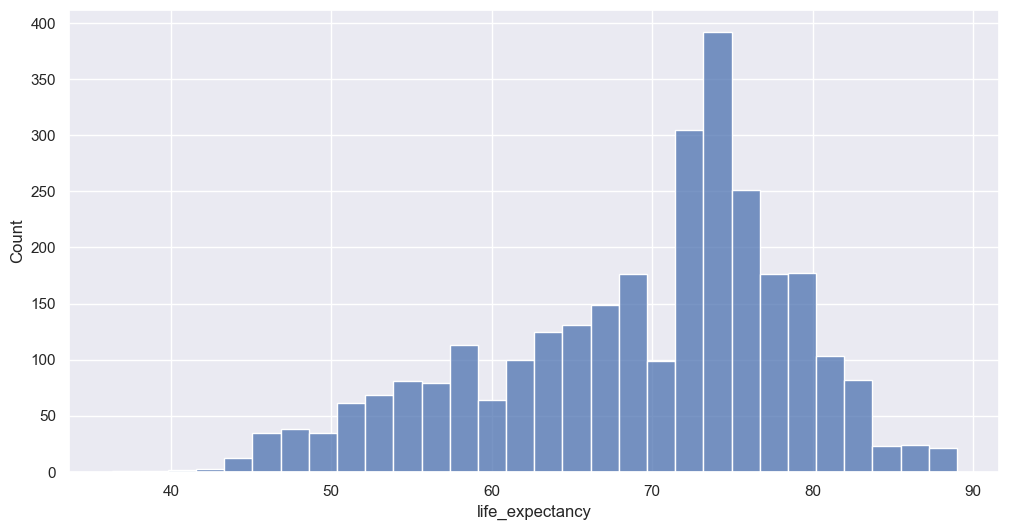

In [46]:
sns.histplot(data=y)


In [54]:
bin_enc=ce.BinaryEncoder()
df=bin_enc.fit_transform(df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_0                        2938 non-null   int64  
 1   country_1                        2938 non-null   int64  
 2   country_2                        2938 non-null   int64  
 3   country_3                        2938 non-null   int64  
 4   country_4                        2938 non-null   int64  
 5   country_5                        2938 non-null   int64  
 6   country_6                        2938 non-null   int64  
 7   country_7                        2938 non-null   int64  
 8   year                             2938 non-null   int64  
 9   status_0                         2938 non-null   int64  
 10  status_1                         2938 non-null   int64  
 11  life_expectancy                  2928 non-null   float64
 12  adult_mortality     

In [56]:
df.corr()['life_expectancy'].nlargest(10)

life_expectancy                    1.000000
schooling                          0.751975
income_composition_of_resources    0.724776
bmi                                0.567694
status_0                           0.482136
diphtheria                         0.479495
polio                              0.465556
gdp                                0.461455
alcohol                            0.404877
percentage_expenditure             0.381864
Name: life_expectancy, dtype: float64

In [57]:
x=bin_enc.fit_transform(x)

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_0                        2938 non-null   int64  
 1   country_1                        2938 non-null   int64  
 2   country_2                        2938 non-null   int64  
 3   country_3                        2938 non-null   int64  
 4   country_4                        2938 non-null   int64  
 5   country_5                        2938 non-null   int64  
 6   country_6                        2938 non-null   int64  
 7   country_7                        2938 non-null   int64  
 8   year                             2938 non-null   int64  
 9   status_0                         2938 non-null   int64  
 10  status_1                         2938 non-null   int64  
 11  adult_mortality                  2928 non-null   float64
 12  infant_deaths       

In [60]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: life_expectancy
Non-Null Count  Dtype  
--------------  -----  
2928 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [61]:
y.isna().sum()

10

In [63]:
y.fillna(y.median(),inplace=True)

In [64]:
y.isna().sum()

0

In [65]:
x.fillna(x.mean(),inplace=True)

In [66]:
x.isna().sum()

country_0                          0
country_1                          0
country_2                          0
country_3                          0
country_4                          0
country_5                          0
country_6                          0
country_7                          0
year                               0
status_0                           0
status_1                           0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
i

In [69]:
scaler=StandardScaler()

In [70]:
x=scaler.fit_transform(x)

In [73]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life_expectancy, Length: 2938, dtype: float64

In [100]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

In [101]:
models={"LR":LinearRegression(),
       "Ridge":Ridge(),
       "Lasso":Lasso(),
       "KNN":KNeighborsRegressor()}

In [108]:
for name,model in models.items():
    print("="*6,name,"="*6)
    print("Score",model.fit(xtrain,ytrain))
    y_pred=model.predict(xtest)
    print("R2",r2_score(ytest,y_pred))
    print("MSE",mean_squared_error(ytest,y_pred,squared=False))
    print("MAE",mean_absolute_error(ytest,y_pred))

====== LR ======
Score LinearRegression()
R2 0.819807923582511
MSE 3.957947195845189
MAE 2.9324203046675947
====== Ridge ======
Score Ridge()
R2 0.8189859448106986
MSE 3.966964370443648
MAE 2.9383368357490576
====== Lasso ======
Score Lasso()
R2 0.7813395667764774
MSE 4.360007667782854
MAE 3.2071537123574076
====== KNN ======
Score KNeighborsRegressor()
R2 0.9277007869172932
MSE 2.5070842936225333
MAE 1.598934240362812


In [106]:
poly=PolynomialFeatures()
xtrain_poly=poly.fit_transform(xtrain)
xtest_poly=poly.transform(xtest)

In [109]:
for name,model in models.items():
    print("="*6,name,"="*6)
    print("Score",model.fit(xtrain_poly,ytrain))
    y_pred=model.predict(xtest_poly)
    print("R2",r2_score(ytest,y_pred))
    print("MSE",mean_squared_error(ytest,y_pred,squared=False))
    print("MAE",mean_absolute_error(ytest,y_pred))

====== LR ======
Score LinearRegression()
R2 0.9086991158051304
MSE 2.81734247371187
MAE 1.9419244384008738
====== Ridge ======
Score Ridge()
R2 0.9066461733674075
MSE 2.8488410148677286
MAE 2.018977695076691
====== Lasso ======
Score Lasso()
R2 0.79189122466343
MSE 4.253508918042089
MAE 3.1684576461841645
====== KNN ======
Score KNeighborsRegressor()
R2 0.9171645904315742
MSE 2.6835529128056455
MAE 1.7354875283446713
